In [87]:
# libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
df = pd.read_csv('datasets/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [73]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [74]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [75]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


/Users/aayush/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


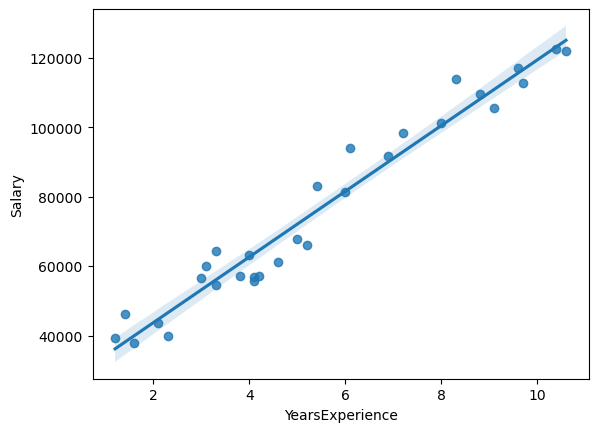

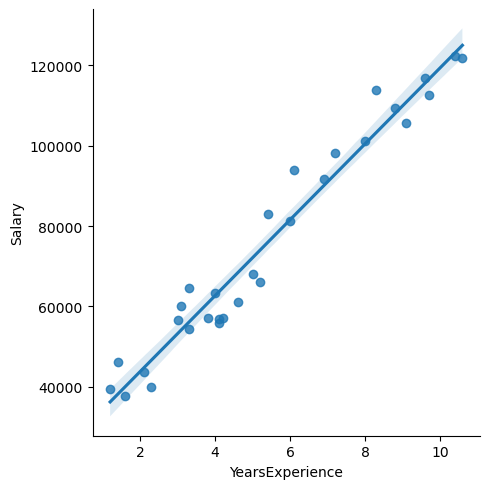

In [77]:
f = sns.regplot(data=df, x='YearsExperience', y='Salary')
g = sns.lmplot(data=df, x='YearsExperience', y='Salary')

yea, a linear regression would work best for this dataset, although i wish there was more data

In [78]:
X, y = df['YearsExperience'].values.reshape(-1, 1), df['Salary'].values

In [79]:
kf = KFold(n_splits=3, shuffle=True, random_state=32)

In [80]:
model = LinearRegression()

In [82]:
rmse_scores = {}
r2_scores = {}

best_r2 = -np.inf

best_fold = None
best_predictions = None
actual = None

fold_num = 1
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    r2_scores[f'Fold {fold_num}'] = r2

    if r2 > best_r2:
        best_r2 = r2
        best_fold = fold_num
        best_predictions = predictions
        actual = y_test

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    rmse_scores[f'Fold {fold_num}'] = rmse

    fold_num += 1


mean_rmse = np.mean(list(rmse_scores.values()))

print(f'RMSE for each fold:', rmse_scores)
print(f'Average RMSE: {mean_rmse}')
print(f'Best R2 score: {best_r2} (Fold {fold_num})')

RMSE for each fold: {'Fold 1': 5502.842674216169, 'Fold 2': 5740.4580142284185, 'Fold 3': 6207.662287671836}
Average RMSE: 5816.987658705475
Best R2 score: 0.9599400275701594 (Fold 4)


our model explains 95% of the variance in the data, and the our average RMSE is 5816 which is 4.7% of the salary values

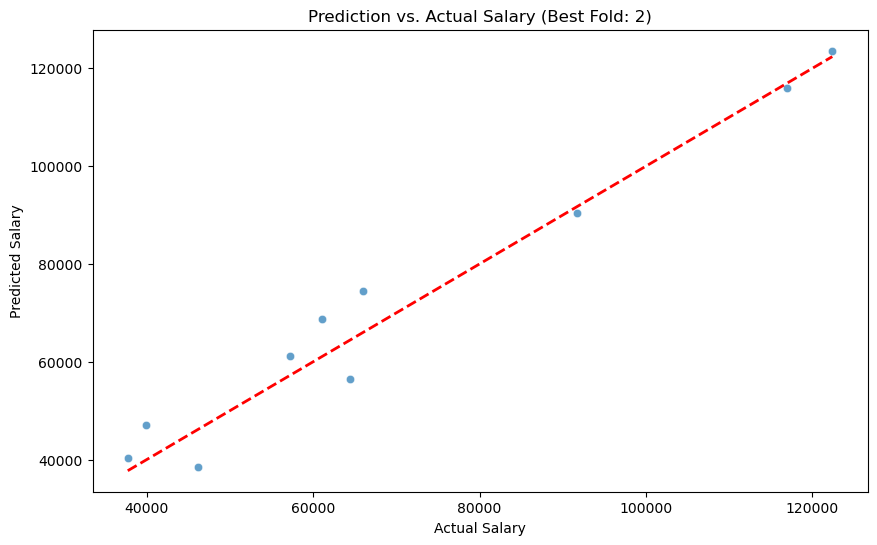

In [86]:
df_plot = pd.DataFrame({
    'Actual': actual,
    'Predictions': best_predictions
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predictions', data=df_plot, alpha=0.7)
plt.plot([df_plot['Actual'].min(), df_plot['Actual'].max()], [df_plot['Actual'].min(), df_plot['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Prediction vs. Actual Salary (Best Fold: {best_fold})')
plt.show()

yay! though if the dataset had more features and was bigger, this would've been more complex